In [1]:
# Importamos los paquetes necesarios para el trabajo
# Paquetes básicos
import os
import random
import numpy as np
import pandas as pd

# Visualización de datos
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocesamiento y análisis de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Funciones específicas de Keras
from keras.utils import to_categorical

# Establecemos el path donde están los archivos necesarios
path = "C:/Users/uib/Desktop/Aggregation ML"
data = pd.read_csv(path+"/df_combinado.csv")

In [2]:
etiquetas = data.iloc[:, -1]
# Convertir etiquetas a números

data.head()

,Area,Centroid_1,Centroid_2,Perimeter,Circularity,Eccentricity,Solidity,MinorAxisLength,MajorAxisLength,Concentration,Time,Enumeration,Aggregation
0,1788,26.631432,448.699105,230.021,0.413295,0.822654,0.734895,39.130281,68.825688,200,2,1,y
1,1036,22.565637,900.053089,131.844,0.714488,0.849155,0.904014,27.275703,51.644406,200,2,2,y
2,1224,44.894608,731.462418,153.182,0.629422,0.885523,0.864407,28.179507,60.653759,200,2,3,y
3,2592,81.331019,232.550154,319.563,0.312777,0.764072,0.655870,60.611996,93.953088,200,2,4,y
4,3000,81.087333,404.985667,400.223,0.231705,0.792118,0.620861,62.498247,102.394393,200,2,5,y


In [3]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["Centroid_1","Centroid_2","Concentration", "Time", "Enumeration", "Aggregation"]

# Eliminar las columnas
data = data.drop(columns=columnas_a_eliminar, axis=1)


In [4]:

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizamos los datos
data_normalizada = scaler.fit_transform(data)
data_normalizada[1:5]


array([[0.00889587, 0.04213588, 0.70004167, 0.87223936, 0.83500412,
        0.05690217, 0.13721992],
       [0.05808477, 0.09846313, 0.58335929, 0.91254724, 0.74172677,
        0.07985378, 0.21714966],
       [0.41601256, 0.53766941, 0.1490228 , 0.77794014, 0.25061086,
        0.90345909, 0.51257675],
       [0.52276295, 0.75059263, 0.03781832, 0.80902401, 0.16816129,
        0.95135941, 0.58746685]])

In [5]:
#La convertimos a Data Frame para analizarla
column_names = data.columns.tolist()
df = pd.DataFrame(data_normalizada, columns=column_names)
df.head()

,Area,Perimeter,Circularity,Eccentricity,Solidity,MinorAxisLength,MajorAxisLength
0,0.205651,0.301300,0.286901,0.842868,0.436719,0.357943,0.289650
1,0.008896,0.042136,0.700042,0.872239,0.835004,0.056902,0.137220
2,0.058085,0.098463,0.583359,0.912547,0.741727,0.079854,0.217150
3,0.416013,0.537669,0.149023,0.777940,0.250611,0.903459,0.512577
4,0.522763,0.750593,0.037818,0.809024,0.168161,0.951359,0.587467


In [6]:
df_norm = pd.concat([df,etiquetas], axis=1)
indice_col_clases = df_norm.shape[1] -1
df_norm = df_norm.rename(columns={df_norm.columns[indice_col_clases]: 'clase'})
df_norm.groupby('clase').describe()

Area                                                              \
       count      mean       std       min       25%       50%       75%   
clase                                                                      
n       64.0  0.038167  0.045368  0.000000  0.012951  0.018838  0.041732   
y      235.0  0.150075  0.150236  0.000523  0.031659  0.113815  0.217033   

                Perimeter            ... MinorAxisLength            \
            max     count      mean  ...             75%       max   
clase                                ...                             
n      0.214286      64.0  0.039933  ...        0.317080  0.409077   
y      1.000000     235.0  0.208778  ...        0.357926  1.000000   

      MajorAxisLength                                                    \
                count      mean       std       min       25%       50%   
clase                                                                     
n                64.0  0.036967  0.048739  0.000000  0.011762  0.020598   
y               235.0  0.291478  0.166548  0.105721  0.176455  0.237018   

                           
            75%       max  
clase                      
n      0.036368  0.242064  
y      0.367782  1.000000  

[2 rows x 56 columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, etiquetas, test_size=1/3, random_state=123, stratify = etiquetas)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convertir a one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_test_encoded = label_encoder.fit_transform(y_test)

# Convertir a one-hot encoding
y_test_one_hot = to_categorical(y_test_encoded)


In [8]:
model = keras.Sequential([
    layers.Dense(units=35, activation='relu', input_shape=[df.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(units=18, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(units=2, activation = 'sigmoid'),
    # Empleamos softmax para obtener la distribución de probabilidad de las clases, la que presente una mayor probabilidad, será la clase que se considerará predecida.
])
model.summary()
# Información del modelo


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                280       
                                                                 
 dropout (Dropout)           (None, 35)                0         
                                                                 
 dense_1 (Dense)             (None, 18)                648       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 38        
                                                                 
Total params: 966 (3.77 KB)
Trainable params: 966 (3.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.05,
    decay_steps=1000,
    decay_rate=0.9)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=lr_schedule), # Stochastic Gradient Descent, para actualizar los pesos en respuesta a la función de pérdida del modelo.
    loss='binary_crossentropy', # Empleamos esta función de pérdida debido a que estamos frente a un problema de clasificación multiclase.
    metrics=['accuracy']
    # En este caso queremos evaluar la precisión del modelo
)
history = model.fit(X_train, y_train_one_hot, epochs=50, validation_split=0.2, verbose=0,   callbacks=[early_stopping])


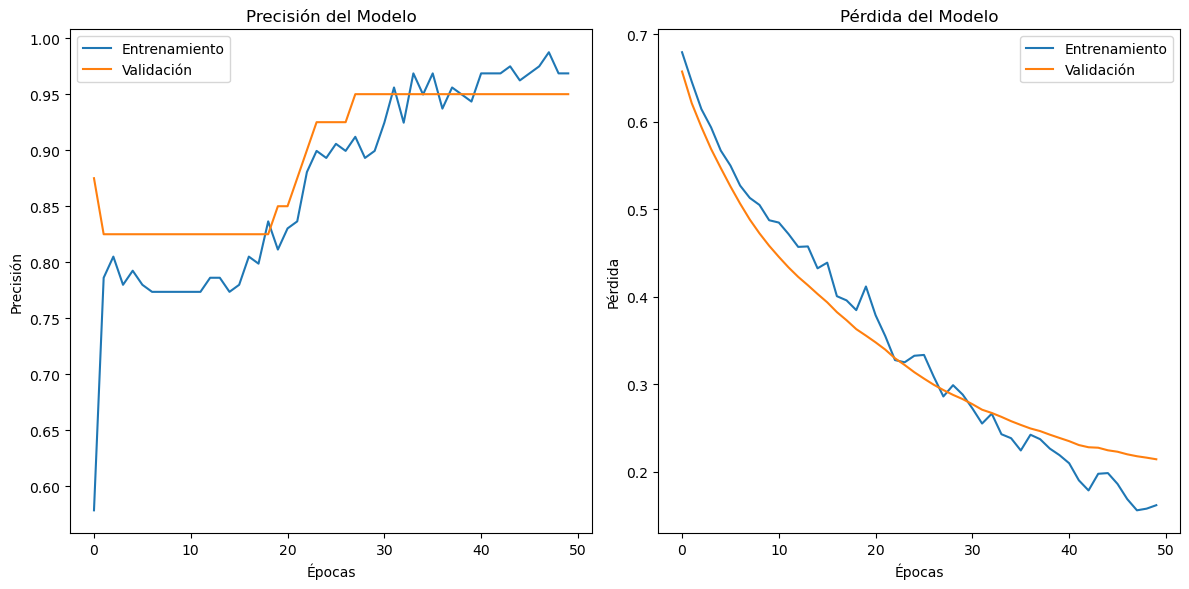

In [10]:
# Función para visualizar la curva de aprendizaje
def plot_training_history(history):
    """
    Función para visualizar la precisión y pérdida del modelo durante el entrenamiento.

    Parameters:
    - history: Objeto History devuelto por el método fit en Keras.
    """

    plt.figure(figsize=(12, 6))

    # Precisión en el conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    # Precisión en el conjunto de validación
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Precisión del Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida en el conjunto de entrenamiento
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    # Pérdida en el conjunto de validación
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Pérdida del Modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_training_history(history)

In [11]:
# Definimos una función para obtener predicciones y analizar resultados del modelo:
def evaluate_model(modelo, x, y):
    """
    Función para obtener predicciones en el conjunto de prueba, construir una matriz de confusión
    y calcular métricas de evaluación.

    Parameters:
    - modelo: Modelo entrenado.
    - x: Conjunto de características de prueba.
    - y: Etiquetas reales del conjunto de prueba.

    """

    # Obtener predicciones en el conjunto de prueba
    y_pred = modelo.predict(x)

    y_pred_max = np.argmax(y_pred, axis=1)
    y_test_clases = np.argmax(y, axis=1)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test_clases, y_pred_max)
    print("Matriz de Confusión:")
    print(conf_matrix)

    # Calcular métricas de evaluación
    classification_rep = classification_report(y_test_clases, y_pred_max)
    print("\n Métricas de Evaluación:")
    print(classification_rep)

    

evaluate_model(model, X_test, y_test_one_hot)



4/4 [==============================] - 0s 2ms/step
Matriz de Confusión:
[[17  4]
 [ 0 79]]

 Métricas de Evaluación:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.95      1.00      0.98        79

    accuracy                           0.96       100
   macro avg       0.98      0.90      0.94       100
weighted avg       0.96      0.96      0.96       100



In [19]:
import glob
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Assuming `model` is already defined as per your architecture

path = 'C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff'
csv_files = glob.glob(os.path.join(path, "*.csv"))

for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)

    # Check if the DataFrame is not empty
    if not df.empty:
        # Assuming your model expects the same input features used during training
        input_columns = ['Area', 'Perimeter', 'Circularity', 'Eccentricity', 'Solidity', 'MinorAxisLength', 'MajorAxisLength']

        # Select relevant columns and scale them (assuming you used StandardScaler during training)
        X = df[input_columns].values
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Make predictions
        predictions = model.predict(X_scaled)

        # Assuming it's binary classification
        threshold = 0.5
        df["Aggregation"] = ["cluster" if pred > threshold else "cell" for pred in predictions[:, 1]]

        # Extract the file name without extension
        file_name_without_extension = os.path.splitext(os.path.basename(file))[0]

        # Save the modified DataFrame to a new CSV file with the _predicted suffix
        new_file_path = os.path.join(path, f"{file_name_without_extension}_predicted.csv")
        df.to_csv(new_file_path, index=False)
        print(f"File saved: {new_file_path}")
    else:
        print(f"Skipped empty file: {file}")

Skipped empty file: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A10_0_2500_-2_results.csv
Skipped empty file: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A10_1_2500_-2_results.csv
Skipped empty file: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A3_0_2500_0_results.csv
Skipped empty file: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A6_0_2500_3_results.csv
Skipped empty file: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A7_0_2500_4_results.csv
1/1 [==============================] - 0s 21ms/step
File saved: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A8_0_2500_5_results_predicted.csv
1/1 [==============================] - 0s 20ms/step
File saved: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A8_1_2500_5_results_predicted.csv
Skipped empty file: C:/Users/uib/Desktop/Experimentos homogeneizacion/Exp_Hom_2/Tiff\A9_0_2500_6_results.csv
Skipped empty fi

KeyError: "None of [Index(['Area', 'Perimeter', 'Circularity', 'Eccentricity', 'Solidity',\n       'MinorAxisLength', 'MajorAxisLength'],\n      dtype='object')] are in the [columns]"